## Install all dependencies

In [1]:
import pandas as pd # To deal with CSV files
import numpy as np # To convert data into array for faster computation also linear algebra
import matplotlib.pyplot as plt # To visualize
import seaborn as sns # Also to visualize
from sklearn import preprocessing # For preprocessing on the dataset
from sklearn.model_selection import train_test_split # For splitting  the dataset
from imblearn.over_sampling import SMOTE # To balance the dataset 
from collections import Counter # To count the number of samples that belong to certain label
from sklearn.metrics import confusion_matrix

Note that I just upload the dataset through colab and name it 'data'.

## Dataset setup and Pre-processing

In [49]:
# Load the dataset.
df = pd.read_csv("/content/data.csv")

In [50]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [52]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [53]:
# We will drop this column "Unnamed: 32" since it's not in the original data amd also "id" column since we can't consider it as feature.
df.drop(["Unnamed: 32","id"],axis = 1,inplace=True)

In [54]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


diagnosis
B    357
M    212
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


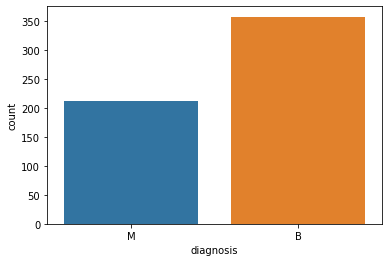

In [55]:
# This is our labels 
sns.countplot(df['diagnosis'])
print(df.groupby('diagnosis').size())

In [56]:
# Visualize the relationship between features
#sns.pairplot(df,hue ='diagnosis')

In [57]:
# This is our labels.
y = df['diagnosis'].values
print(y[:20])
# We need to convert the value of the label to numeric value so we can apply it to our DL techniques M=1,B=0.
le = preprocessing.LabelEncoder()
Y= le.fit_transform(y)
print(Y[:20])
# We will drop it from the original data to create your features data.
df.drop('diagnosis',axis=1, inplace=True)

# We have 30 features
df.head()

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
# We need to scale the data to be in the same range, sure with this we are assuming the features are equally important, but scaling will increase the training speed and accuracy
# StandardScaler will make the mean zero and the standardization equal to one
x = df
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(x)
type(X)
# 569 samples with 30 featueres
print(X.shape)
X[:2] #Two samples

(569, 30)


array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [59]:
# converting the scale result from numpy array to dataframe to plot it
scaler_df = pd.DataFrame(X, index=df.index, columns=df.columns)
scaler_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [60]:
# We need to balance the dataset
print("before:",Counter(Y))
print(X.shape)
smote = SMOTE(random_state=66)
X,Y = smote.fit_resample(X,Y)
print("After:",Counter(Y))
print(X.shape)

before: Counter({0: 357, 1: 212})
(569, 30)
After: Counter({1: 357, 0: 357})
(714, 30)


In [61]:
# Splitting the data to training 80%, validation 10% and testing 10%
x_train, evalx, y_train, evaly = train_test_split(X, Y, test_size=0.1)
#x_val, x_test, y_val, y_test = train_test_split(evalx,evaly, test_size = 0.5, random_state=55)
print('Train shape:', x_train.shape)
print('Eval shape:', evalx.shape)
#print('Test shape:', x_test.shape)
#print('Valdation shape:', x_val.shape)
print('Labels shape for train, eval:', y_train.shape, evaly.shape)
#print('Labels shape for train, val and test:', y_train.shape, y_val.shape, y_test.shape)

Train shape: (642, 30)
Eval shape: (72, 30)
Labels shape for train, eval: (642,) (72,)


## Classification using DL

In [45]:
import tensorflow as tf # To use keras
import keras # To use the librariy tools for DL
from keras.models import Sequential # To build the model
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D, MaxPooling1D # To add layers to the model

### MLP classifier

In [16]:
# Here we are building the MLP model
model = Sequential()
model.add(Dense(15,activation='relu', input_dim=30))
#model.add(Dropout(0.1))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
#tf.keras.optimizers.Adam(learning_rate=3e-5)
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                465       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 batch_normalization (BatchN  (None, 5)                20        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                        

In [17]:
# Here we are training the model
#validation_data=(evalx, evaly)
mlp = model.fit(x_train, y_train, verbose=1, epochs=100, batch_size=16,
                    validation_split=0.2)

Epoch 1/100
33/33 [==============================] - 3s 25ms/step - loss: 0.6211 - accuracy: 0.6959 - val_loss: 0.5347 - val_accuracy: 0.8140
Epoch 2/100
33/33 [==============================] - 0s 8ms/step - loss: 0.3534 - accuracy: 0.8655 - val_loss: 0.4587 - val_accuracy: 0.8915
Epoch 3/100
33/33 [==============================] - 0s 9ms/step - loss: 0.2996 - accuracy: 0.9025 - val_loss: 0.4073 - val_accuracy: 0.8915
Epoch 4/100
33/33 [==============================] - 0s 8ms/step - loss: 0.2735 - accuracy: 0.9259 - val_loss: 0.3654 - val_accuracy: 0.9225
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 0.2508 - accuracy: 0.9181 - val_loss: 0.3371 - val_accuracy: 0.9225
Epoch 6/100
33/33 [==============================] - 0s 7ms/step - loss: 0.2051 - accuracy: 0.9552 - val_loss: 0.3043 - val_accuracy: 0.9302
Epoch 7/100
33/33 [==============================] - 0s 6ms/step - loss: 0.1869 - accuracy: 0.9552 - val_loss: 0.2723 - val_accuracy: 0.9380
Epoch 8/100


In [18]:
_, accuracy = mlp.model.evaluate(evalx,evaly)
print("Test accuracy:", round(accuracy * 100, 2),'%')

3/3 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 1.0000
Test accuracy: 100.0 %


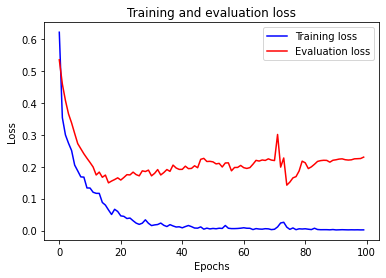

In [19]:
loss = mlp.history['loss']
eval_loss = mlp.history['val_loss']
plt.plot(loss, 'b', label='Training loss')
plt.plot(eval_loss, 'r', label='Evaluation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and evaluation loss')
plt.legend()
plt.show()

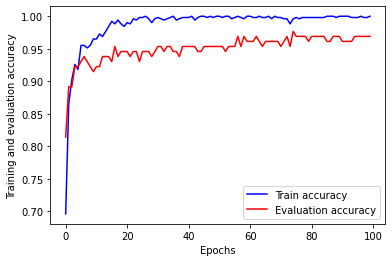

In [20]:
train_accuracy = mlp.history['accuracy']
eval_accuracy = mlp.history['val_accuracy']
plt.plot(train_accuracy, 'b', label = 'Train accuracy')
plt.plot(eval_accuracy, 'r', label = 'Evaluation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training and evaluation accuracy')
plt.legend()
plt.show()

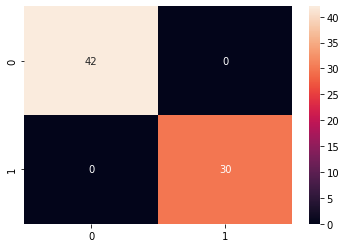

In [21]:
# Confusion matrix
evalp = mlp.model.predict(evalx) # Evaluation set prediction
evaltrue = (evalp>0.5)
cm=confusion_matrix(evaly,evaltrue)
sns.heatmap(cm, annot=True)

### CNN classifier

In [62]:
print("Before expanding to fit CNN model:")
print(x_train.shape)
print(evalx.shape)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
evalx = evalx.reshape(evalx.shape[0],evalx.shape[1],1)
print("After expanding to fit CNN model:")
print(x_train.shape)
print(evalx.shape)

Before expanding to fit CNN model:
(642, 30)
(72, 30)
After expanding to fit CNN model:
(642, 30, 1)
(72, 30, 1)


In [63]:
# Here we are building the CNN model

model = Sequential()
model.add(Conv1D(filters=30, kernel_size=4, padding='same', activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=15, kernel_size=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 30, 30)            150       
                                                                 
 batch_normalization_12 (Bat  (None, 30, 30)           120       
 chNormalization)                                                
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 15, 30)           0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 15, 15)            915       
                                                                 
 batch_normalization_13 (Bat  (None, 15, 15)           60        
 chNormalization)                                                
                                                      

In [64]:
cnn = model.fit(x_train, y_train, verbose=1, epochs=100, batch_size=16,
                    validation_split=0.2)

Epoch 1/100
33/33 [==============================] - 2s 12ms/step - loss: 0.2327 - accuracy: 0.9142 - val_loss: 0.5050 - val_accuracy: 0.9380
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1010 - accuracy: 0.9591 - val_loss: 0.4503 - val_accuracy: 0.9535
Epoch 3/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0928 - accuracy: 0.9688 - val_loss: 0.3601 - val_accuracy: 0.9612
Epoch 4/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0558 - accuracy: 0.9786 - val_loss: 0.3228 - val_accuracy: 0.9535
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0568 - accuracy: 0.9786 - val_loss: 0.2716 - val_accuracy: 0.9690
Epoch 6/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0542 - accuracy: 0.9844 - val_loss: 0.2183 - val_accuracy: 0.9690
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.9883 - val_loss: 0.1770 - val_accuracy: 0.9690
Epoch 8/100


In [65]:
_, accuracy = cnn.model.evaluate(evalx,evaly)
print("Test accuracy:", round(accuracy * 100, 2),'%')

3/3 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.9722
Test accuracy: 97.22 %


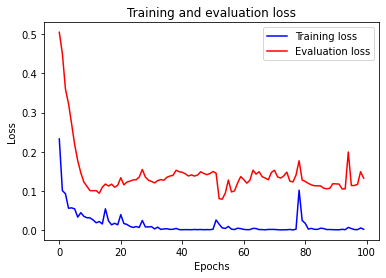

In [66]:
loss = cnn.history['loss']
eval_loss = cnn.history['val_loss']
plt.plot(loss, 'b', label='Training loss')
plt.plot(eval_loss, 'r', label='Evaluation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and evaluation loss')
plt.legend()
plt.show()

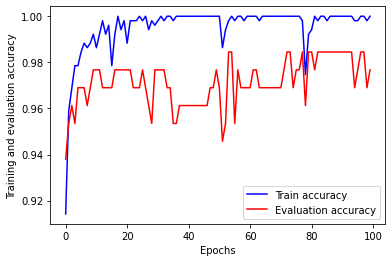

In [67]:
train_accuracy = cnn.history['accuracy']
eval_accuracy = cnn.history['val_accuracy']
plt.plot(train_accuracy, 'b', label = 'Train accuracy')
plt.plot(eval_accuracy, 'r', label = 'Evaluation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training and evaluation accuracy')
plt.legend()
plt.show()

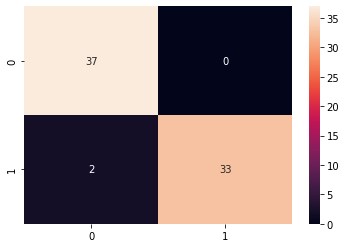

In [68]:
# Confusion matrix
evalp = cnn.model.predict(evalx) # Evaluation set prediction
evaltrue = (evalp>0.5)
cm=confusion_matrix(evaly,evaltrue)
sns.heatmap(cm, annot=True)